# 지하철 역별 상권 분석

In [113]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH='C:/Users/castl/Desktop/2022bigdata/visualize_project/data'

sp=pd.read_csv(PATH+'/서울시 우리마을가게 상권분석서비스(상권-생활인구).csv',encoding='cp949')
income_21=pd.read_csv(PATH+'/서울시 우리마을가게 상권분석서비스(상권-추정매출).csv',encoding='cp949')
where=pd.read_csv(PATH+'/서울시 우리마을가게 상권분석서비스(상권영역).csv',encoding='cp949')
gu_code=pd.read_csv(PATH+'/행정동코드_매핑정보_2018.csv')

## 생활인구

: 통신데이터로 특정 시점의 개인이 위차한 지역 인구(상주인구+직장인구)

In [102]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46263 entries, 0 to 46262
Columns: 532 entries, 기준 년코드 to 여성연령대_60_이상_일요일시간대_6_생활인구_수
dtypes: int64(529), object(3)
memory usage: 187.8+ MB


In [103]:
for i in sp.keys():
    print(i,'-->',type(sp[i][0]),sp[i][0])

기준 년코드 --> <class 'numpy.int64'> 2021
기준_분기_코드 --> <class 'numpy.int64'> 3
상권_구분_코드 --> <class 'str'> U
 상권_구분_코드_명 --> <class 'str'> 관광특구
상권_코드 --> <class 'numpy.int64'> 1001496
상권_코드_명 --> <class 'str'> 강남 마이스 관광특구
총_생활인구_수 --> <class 'numpy.int64'> 84144
남성_생활인구_수 --> <class 'numpy.int64'> 42839
여성_생활인구_수 --> <class 'numpy.int64'> 41306
연령대_10_생활인구_수 --> <class 'numpy.int64'> 5308
연령대_20_생활인구_수 --> <class 'numpy.int64'> 17883
연령대_30_생활인구_수 --> <class 'numpy.int64'> 23311
연령대_40_생활인구_수 --> <class 'numpy.int64'> 18730
연령대_50_생활인구_수 --> <class 'numpy.int64'> 10423
연령대_60_이상_생활인구_수 --> <class 'numpy.int64'> 8490
시간대_1_생활인구_수 --> <class 'numpy.int64'> 6223
시간대_2_생활인구_수 --> <class 'numpy.int64'> 17115
시간대_3_생활인구_수 --> <class 'numpy.int64'> 19093
시간대_4_생활인구_수 --> <class 'numpy.int64'> 19727
시간대_5_생활인구_수 --> <class 'numpy.int64'> 17246
시간대_6_생활인구_수 --> <class 'numpy.int64'> 4738
월요일_생활인구_수 --> <class 'numpy.int64'> 12423
화요일_생활인구_수 --> <class 'numpy.int64'> 13019
수요일_생활인구_수 --> <class 'nump

여성연령대_50_목요일시간대_6_생활인구_수 --> <class 'numpy.int64'> 33
여성연령대_50_금요일시간대_1_생활인구_수 --> <class 'numpy.int64'> 50
여성연령대_50_금요일시간대_2_생활인구_수 --> <class 'numpy.int64'> 145
여성연령대_50_금요일시간대_3_생활인구_수 --> <class 'numpy.int64'> 169
여성연령대_50_금요일시간대_4_생활인구_수 --> <class 'numpy.int64'> 166
여성연령대_50_금요일시간대_5_생활인구_수 --> <class 'numpy.int64'> 138
여성연령대_50_금요일시간대_6_생활인구_수 --> <class 'numpy.int64'> 36
여성연령대_50_토요일시간대_1_생활인구_수 --> <class 'numpy.int64'> 51
여성연령대_50_토요일시간대_2_생활인구_수 --> <class 'numpy.int64'> 108
여성연령대_50_토요일시간대_3_생활인구_수 --> <class 'numpy.int64'> 132
여성연령대_50_토요일시간대_4_생활인구_수 --> <class 'numpy.int64'> 136
여성연령대_50_토요일시간대_5_생활인구_수 --> <class 'numpy.int64'> 121
여성연령대_50_토요일시간대_6_생활인구_수 --> <class 'numpy.int64'> 31
여성연령대_50_일요일시간대_1_생활인구_수 --> <class 'numpy.int64'> 39
여성연령대_50_일요일시간대_2_생활인구_수 --> <class 'numpy.int64'> 89
여성연령대_50_일요일시간대_3_생활인구_수 --> <class 'numpy.int64'> 110
여성연령대_50_일요일시간대_4_생활인구_수 --> <class 'numpy.int64'> 118
여성연령대_50_일요일시간대_5_생활인구_수 --> <class 'numpy.int64'> 104
여성연령대_50_일요일시간대_6

In [104]:
for i in income_21.keys():
    print(i,'-->',type(income_21[i][0]),income_21[i][0])

기준_년_코드 --> <class 'numpy.int64'> 2021
기준_분기_코드 --> <class 'numpy.int64'> 3
상권_구분_코드 --> <class 'str'> U
상권_구분_코드_명 --> <class 'str'> 관광특구
상권_코드 --> <class 'numpy.int64'> 1001496
상권_코드_명 --> <class 'str'> 강남 마이스 관광특구
서비스_업종_코드 --> <class 'str'> CS300043
서비스_업종_코드_명 --> <class 'str'> 전자상거래업
분기당_매출_금액 --> <class 'numpy.int64'> 1713936
분기당_매출_건수 --> <class 'numpy.int64'> 34
주중_매출_비율 --> <class 'numpy.int64'> 100
주말_매출_비율 --> <class 'numpy.int64'> 0
월요일_매출_비율 --> <class 'numpy.int64'> 0
화요일_매출_비율 --> <class 'numpy.int64'> 0
수요일_매출_비율 --> <class 'numpy.int64'> 11
목요일_매출_비율 --> <class 'numpy.int64'> 89
금요일_매출_비율 --> <class 'numpy.int64'> 0
토요일_매출_비율 --> <class 'numpy.int64'> 0
일요일_매출_비율 --> <class 'numpy.int64'> 0
시간대_00~06_매출_비율 --> <class 'numpy.int64'> 0
시간대_06~11_매출_비율 --> <class 'numpy.int64'> 9
시간대_11~14_매출_비율 --> <class 'numpy.int64'> 7
시간대_14~17_매출_비율 --> <class 'numpy.int64'> 83
시간대_17~21_매출_비율 --> <class 'numpy.int64'> 2
시간대_21~24_매출_비율 --> <class 'numpy.int64'> 0
남성_매출_비율 --> <cla

In [105]:
where=where.drop(['형태정보'],axis=1)
where

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
0,201810,A,골목상권,1000275,보문로26길,201886,454183,11290,11290600
1,201810,A,골목상권,1000276,보문로31길,201385,454290,11290,11290555
2,201810,D,발달상권,1001045,동작구 총신대입구역_1,198304,442948,11590,11590630
3,201810,D,발달상권,1001046,서울 관악구 신림역_4,193828,443001,11620,11620695
4,201810,D,발달상권,1001047,뱅뱅사거리_1,202960,443242,11680,11680655
...,...,...,...,...,...,...,...,...,...
1491,201810,D,발달상권,1001153,당산역_1,191112,448327,11560,11560620
1492,201810,D,발달상권,1001154,용산 전자상가_4,196450,448406,11170,11170560
1493,201810,D,발달상권,1001155,용산 전자상가_5,196870,448350,11170,11170560
1494,201810,D,발달상권,1001156,서울 강동구 길동역,212214,448512,11740,11740685


In [106]:
# 시군구 코드로 where  inner join
# 기준이 되는 colum 이름을 동일하게 하여 merge 할 수 있게함

gu_code.rename(columns={'RESD_CD':'시군구_코드','RESC_CT_NM':'시군구_명'},inplace=True)
guwhere=where.merge(gu_code[['시군구_코드','시군구_명']], how='inner', on =['시군구_코드'])
guwhere

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구_명
0,201810,A,골목상권,1000275,보문로26길,201886,454183,11290,11290600,성북구
1,201810,A,골목상권,1000276,보문로31길,201385,454290,11290,11290555,성북구
2,201810,R,전통시장,1001338,돈암제일시장,201402,454703,11290,11290555,성북구
3,201810,A,골목상권,1000298,정릉로27길,201136,456377,11290,11290630,성북구
4,201810,A,골목상권,1000299,정릉로8길,199817,456396,11290,11290640,성북구
...,...,...,...,...,...,...,...,...,...,...
1491,201810,R,전통시장,1001404,신정제일시장,187123,446835,11470,11470620,양천구
1492,201810,R,전통시장,1001405,신정2동골목시장,189085,446859,11470,11470630,양천구
1493,201810,R,전통시장,1001406,신정3동골목시장,187005,446592,11470,11470640,양천구
1494,201810,R,전통시장,1001394,목2동시장,188801,449649,11470,11470520,양천구


In [116]:
# sp데이터 중 원하는 컬럼만 사용(요일 까지만)
want=sp.columns.unique()[:28]
sp_all=sp[want]


# 구, x좌표, y좌표 join한 생활인구 데이터
sp_all=sp_all.merge(guwhere[['상권_코드','시군구_명','엑스좌표_값','와이좌표_값']],how='inner',on='상권_코드')
sp_all

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,84144,42839,41306,5308,...,12423,13019,13178,13992,13701,9591,8244,강남구,205310,445727
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,...,14551,15070,14804,15586,15381,11155,9367,강남구,205310,445727
2,2021,1,U,관광특구,1001496,강남 마이스 관광특구,88025,44225,43800,5063,...,13456,14127,14243,14019,13307,10139,8735,강남구,205310,445727
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,14166,14782,15082,14512,13934,10092,8270,강남구,205310,445727
4,2020,3,U,관광특구,1001496,강남 마이스 관광특구,97662,49322,48340,5557,...,14696,15628,15297,16139,16028,10950,8926,강남구,205310,445727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46258,2015,1,A,골목상권,1000001,계동길,107573,64734,42835,2003,...,20597,20798,18108,17141,15259,8856,6814,종로구,198799,453610
46259,2014,4,A,골목상권,1000001,계동길,135676,77984,57692,3671,...,21515,23229,23752,22540,22639,13415,8590,종로구,198799,453610
46260,2014,3,A,골목상권,1000001,계동길,166128,94632,71495,5416,...,27000,28175,23699,29227,29796,17843,10387,종로구,198799,453610
46261,2014,2,A,골목상권,1000001,계동길,164593,93204,71387,5989,...,24156,29252,29493,27228,27840,16325,10296,종로구,198799,453610


In [118]:
# null값 확인

sp_all.isna().sum()

기준 년코드              0
기준_분기_코드            0
상권_구분_코드            0
 상권_구분_코드_명         0
상권_코드               0
상권_코드_명             0
총_생활인구_수            0
남성_생활인구_수           0
여성_생활인구_수           0
연령대_10_생활인구_수       0
연령대_20_생활인구_수       0
연령대_30_생활인구_수       0
연령대_40_생활인구_수       0
연령대_50_생활인구_수       0
연령대_60_이상_생활인구_수    0
시간대_1_생활인구_수        0
시간대_2_생활인구_수        0
시간대_3_생활인구_수        0
시간대_4_생활인구_수        0
시간대_5_생활인구_수        0
시간대_6_생활인구_수        0
월요일_생활인구_수          0
화요일_생활인구_수          0
수요일_생활인구_수          0
목요일_생활인구_수          0
금요일_생활인구_수          0
토요일_생활인구_수          0
일요일_생활인구_수          0
시군구_명               0
엑스좌표_값              0
와이좌표_값              0
dtype: int64

In [122]:
#기준 년코드 2018년도 이상인 것만 사용

sp_all=sp_all[sp_all['기준 년코드']>=2018]

# sp_recent(최근 1년)
sp_recent=sp_all[((sp_all['기준 년코드']==2020)&(sp_all['기준_분기_코드']==4))|(sp_all['기준 년코드']==2021)]
sp_recent

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,84144,42839,41306,5308,...,12423,13019,13178,13992,13701,9591,8244,강남구,205310,445727
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,...,14551,15070,14804,15586,15381,11155,9367,강남구,205310,445727
2,2021,1,U,관광특구,1001496,강남 마이스 관광특구,88025,44225,43800,5063,...,13456,14127,14243,14019,13307,10139,8735,강남구,205310,445727
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,14166,14782,15082,14512,13934,10092,8270,강남구,205310,445727
31,2021,3,U,관광특구,1001495,잠실 관광특구,3029714,1470103,1559610,280084,...,426509,430062,440535,443585,447048,433886,408089,송파구,210191,446339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46204,2020,4,A,골목상권,1000002,난계로27길,354032,180395,173637,17245,...,50540,51172,50881,49644,50213,50592,50991,종로구,201996,452630
46232,2021,3,A,골목상권,1000001,계동길,275537,138891,136646,37211,...,40377,42040,42218,43722,41892,33838,31450,종로구,198799,453610
46233,2021,2,A,골목상권,1000001,계동길,302793,153690,149104,46682,...,45907,47023,45752,47205,46503,36648,33759,종로구,198799,453610
46234,2021,1,A,골목상권,1000001,계동길,282796,142207,140590,34007,...,42432,44311,43579,43185,41685,34576,33028,종로구,198799,453610


In [194]:
what='강남 마이스 관광특구'
tmp=sp_recent[sp_recent['상권_코드_명']==what]
tmp['기준_분기_코드']=tmp['기준_분기_코드'].replace({3:'3분기',2:'2분기',1:'1분기',4:'4분기'})
tmp

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3분기,U,관광특구,1001496,강남 마이스 관광특구,84144,42839,41306,5308,...,12423,13019,13178,13992,13701,9591,8244,강남구,205310,445727
1,2021,2분기,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,...,14551,15070,14804,15586,15381,11155,9367,강남구,205310,445727
2,2021,1분기,U,관광특구,1001496,강남 마이스 관광특구,88025,44225,43800,5063,...,13456,14127,14243,14019,13307,10139,8735,강남구,205310,445727
3,2020,4분기,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,14166,14782,15082,14512,13934,10092,8270,강남구,205310,445727


## 요일별 생활인구 확인

In [195]:
p=[]
d=[]
d_many=[]
n_many=[]
mon=tmp['월요일_생활인구_수'].sum()
tus=tmp['화요일_생활인구_수'].sum()
wed=tmp['수요일_생활인구_수'].sum()
thu=tmp['목요일_생활인구_수'].sum()
fri=tmp['금요일_생활인구_수'].sum()
sat=tmp['토요일_생활인구_수'].sum()
sun=tmp['일요일_생활인구_수'].sum()
for i in range(4):
    for j in range(7):
        if j==0:
            p.append(tmp['기준_분기_코드'][i])
            d.append('월')
            d_many.append(tmp['월요일_생활인구_수'][i])
            n_many.append(mon)
            mon-=tmp['월요일_생활인구_수'][i]
        elif j==1:
            p.append(tmp['기준_분기_코드'][i])
            d.append('화')
            d_many.append(tmp['화요일_생활인구_수'][i])
            n_many.append(tus)
            tus-=tmp['화요일_생활인구_수'][i]
        elif j==2:
            p.append(tmp['기준_분기_코드'][i])
            d.append('수')
            d_many.append(tmp['수요일_생활인구_수'][i])
            n_many.append(wed)
            wed-=tmp['수요일_생활인구_수'][i]
        elif j==3:
            p.append(tmp['기준_분기_코드'][i])
            d.append('목')
            d_many.append(tmp['목요일_생활인구_수'][i])
            n_many.append(thu)
            thu-=tmp['목요일_생활인구_수'][i]
        elif j==4:
            p.append(tmp['기준_분기_코드'][i])
            d.append('금')
            d_many.append(tmp['금요일_생활인구_수'][i])
            n_many.append(fri)
            fri-=tmp['금요일_생활인구_수'][i]
        elif j==5:
            p.append(tmp['기준_분기_코드'][i])
            d.append('토')
            d_many.append(tmp['토요일_생활인구_수'][i])
            n_many.append(sat)
            sat-=tmp['토요일_생활인구_수'][i]
        else:
            p.append(tmp['기준_분기_코드'][i])
            d.append('일')
            d_many.append(tmp['일요일_생활인구_수'][i])
            n_many.append(sun)
            sun-=tmp['일요일_생활인구_수'][i]
days=pd.DataFrame({'분기':p,'요일':d, '생활 인구 수':d_many, '생활 인구':n_many})
days

,분기,요일,생활 인구 수,생활 인구
0,3분기,월,12423,54596
1,3분기,화,13019,56998
2,3분기,수,13178,57307
3,3분기,목,13992,58109
4,3분기,금,13701,56323
5,3분기,토,9591,40977
6,3분기,일,8244,34616
7,2분기,월,14551,42173
8,2분기,화,15070,43979
9,2분기,수,14804,44129


<AxesSubplot:xlabel='요일', ylabel='생활 인구'>

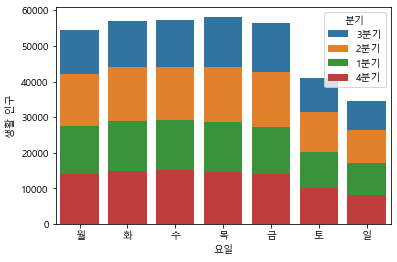

In [197]:
sns.barplot(x='요일',y='생활 인구',data=days,hue='분기',dodge=False)

## 나이별 생활인구 확인

In [202]:
p=[]
d=[]
d_many=[]
n_many=[]
over10=tmp['연령대_10_생활인구_수'].sum()
over20=tmp['연령대_20_생활인구_수'].sum()
over30=tmp['연령대_30_생활인구_수'].sum()
over40=tmp['연령대_40_생활인구_수'].sum()
over50=tmp['연령대_50_생활인구_수'].sum()
over60=tmp['연령대_60_이상_생활인구_수'].sum()
for i in range(4):
    for j in range(6):
        if j==5:
            p.append(tmp['기준_분기_코드'][i])
            d.append('60대 이상')
            d_many.append(tmp['연령대_60_이상_생활인구_수'][i])
            n_many.append(over60)
            over60-=tmp['연령대_60_이상_생활인구_수'][i]
        elif j==4:
            p.append(tmp['기준_분기_코드'][i])
            d.append('50대')
            d_many.append(tmp['연령대_50_생활인구_수'][i])
            n_many.append(over50)
            over50-=tmp['연령대_50_생활인구_수'][i]
        elif j==3:
            p.append(tmp['기준_분기_코드'][i])
            d.append('40대')
            d_many.append(tmp['연령대_40_생활인구_수'][i])
            n_many.append(over40)
            over40-=tmp['연령대_40_생활인구_수'][i]
        elif j==2:
            p.append(tmp['기준_분기_코드'][i])
            d.append('30대')
            d_many.append(tmp['연령대_30_생활인구_수'][i])
            n_many.append(over30)
            over30-=tmp['연령대_30_생활인구_수'][i]
        elif j==1:
            p.append(tmp['기준_분기_코드'][i])
            d.append('20대')
            d_many.append(tmp['연령대_20_생활인구_수'][i])
            n_many.append(over20)
            over20-=tmp['연령대_20_생활인구_수'][i]
        else:
            p.append(tmp['기준_분기_코드'][i])
            d.append('10대')
            d_many.append(tmp['연령대_10_생활인구_수'][i])
            n_many.append(over10)
            over10-=tmp['연령대_10_생활인구_수'][i]
ages=pd.DataFrame({'분기':p,'연령대':d, '생활 인구 수':d_many, '생활 인구':n_many})
ages

,분기,연령대,생활 인구 수,생활 인구
0,3분기,10대,5308,20019
1,3분기,20대,17883,77278
2,3분기,30대,23311,103208
3,3분기,40대,18730,78868
4,3분기,50대,10423,43664
5,3분기,60대 이상,8490,35884
6,2분기,10대,5297,14711
7,2분기,20대,20682,59395
8,2분기,30대,27920,79897
9,2분기,40대,21070,60138


<AxesSubplot:xlabel='연령대', ylabel='생활 인구'>

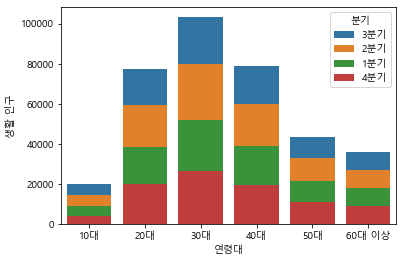

In [203]:
sns.barplot(x='연령대',y='생활 인구',data=ages,hue='분기',dodge=False)

## 시간별 생활인구

In [205]:
p=[]
d=[]
d_many=[]
n_many=[]
time1=tmp['시간대_1_생활인구_수'].sum()
time2=tmp['시간대_2_생활인구_수'].sum()
time3=tmp['시간대_3_생활인구_수'].sum()
time4=tmp['시간대_4_생활인구_수'].sum()
time5=tmp['시간대_5_생활인구_수'].sum()
time6=tmp['시간대_6_생활인구_수'].sum()
for i in range(4):
    for j in range(6):
        if j==0:
            p.append(tmp['기준_분기_코드'][i])
            d.append('00시~6시')
            d_many.append(tmp['시간대_1_생활인구_수'][i])
            n_many.append(time1)
            time1-=tmp['시간대_1_생활인구_수'][i]
        elif j==1:
            p.append(tmp['기준_분기_코드'][i])
            d.append('6시~11시')
            d_many.append(tmp['시간대_2_생활인구_수'][i])
            n_many.append(time2)
            time2-=tmp['시간대_2_생활인구_수'][i]
        elif j==2:
            p.append(tmp['기준_분기_코드'][i])
            d.append('11시~14시')
            d_many.append(tmp['시간대_3_생활인구_수'][i])
            n_many.append(time3)
            time3-=tmp['시간대_3_생활인구_수'][i]
        elif j==3:
            p.append(tmp['기준_분기_코드'][i])
            d.append('14시~17시')
            d_many.append(tmp['시간대_4_생활인구_수'][i])
            n_many.append(time4)
            time4-=tmp['시간대_4_생활인구_수'][i]
        elif j==4:
            p.append(tmp['기준_분기_코드'][i])
            d.append('17시~21시')
            d_many.append(tmp['시간대_5_생활인구_수'][i])
            n_many.append(time5)
            time5-=tmp['시간대_5_생활인구_수'][i]
        else:
            p.append(tmp['기준_분기_코드'][i])
            d.append('21시~24시')
            d_many.append(tmp['시간대_6_생활인구_수'][i])
            n_many.append(time6)
            time6-=tmp['시간대_6_생활인구_수'][i]
times=pd.DataFrame({'분기':p,'시간대':d, '생활 인구 수':d_many, '생활 인구':n_many})
times

,분기,시간대,생활 인구 수,생활 인구
0,3분기,00시~6시,6223,24336
1,3분기,6시~11시,17115,71331
2,3분기,11시~14시,19093,82329
3,3분기,14시~17시,19727,84880
4,3분기,17시~21시,17246,75887
5,3분기,21시~24시,4738,20153
6,2분기,00시~6시,6249,18113
7,2분기,6시~11시,18973,54216
8,2분기,11시~14시,22195,63236
9,2분기,14시~17시,22769,65153


<AxesSubplot:xlabel='시간대', ylabel='생활 인구'>

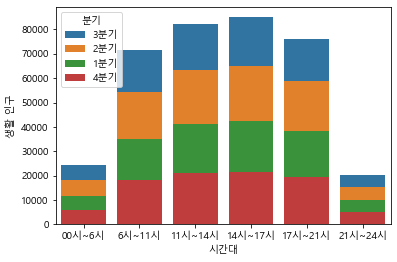

In [207]:
sns.barplot(x='시간대',y='생활 인구',data=times,hue='분기',dodge=False)